In [1]:
# To check if Jupyter notebook is running in the right environment
import sys
print(sys.executable)

/Users/isikm/opt/anaconda/envs/sampl6_pKa/bin/python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
df_exp = pd.read_csv("pKa_experimental_values.csv")
df_exp

,Molecule ID,pKa1 mean,pKa1 SEM,pKa2 mean,pKa2 SEM,pKa3 mean,pKa3 SEM,Assay Type,Experimental Molecule ID,canonical isomeric SMILES
0,SM01,9.53,0.01,NaN,NaN,NaN,NaN,UV-metric pKa,M01,c1cc2c(cc1O)c3c(o2)C(=O)NCCC3
1,SM02,5.03,0.01,NaN,NaN,NaN,NaN,"UV-metric psKa, Yasuda-Shedlovsky Extrapolation",M02,c1ccc2c(c1)c(ncn2)Nc3cccc(c3)C(F)(F)F
2,SM03,7.02,0.01,NaN,NaN,NaN,NaN,"UV-metric psKa, Yasuda-Shedlovsky Extrapolation",M03,c1ccc(cc1)Cc2nnc(s2)NC(=O)c3cccs3
3,SM04,6.02,0.01,NaN,NaN,NaN,NaN,UV-metric pKa,M04,c1ccc2c(c1)c(ncn2)NCc3ccc(cc3)Cl
4,SM05,4.59,0.01,NaN,NaN,NaN,NaN,"UV-metric psKa, Yasuda-Shedlovsky Extrapolation",M05,c1ccc(c(c1)NC(=O)c2ccc(o2)Cl)N3CCCCC3
5,SM06,3.03,0.04,11.74,0.01,NaN,NaN,UV-metric pKa,M06,c1cc2cccnc2c(c1)NC(=O)c3cc(cnc3)Br
6,SM07,6.08,0.01,NaN,NaN,NaN,NaN,UV-metric pKa,M07,c1ccc(cc1)CNc2c3ccccc3ncn2
7,SM08,4.22,0.01,NaN,NaN,NaN,NaN,UV-metric pKa,M08,Cc1ccc2c(c1)c(c(c(=O)[nH]2)CC(=O)O)c3ccccc3
8,SM09,5.37,0.01,NaN,NaN,NaN,NaN,"UV-metric psKa, Yasuda-Shedlovsky Extrapolation",M09,COc1cccc(c1)Nc2c3ccccc3ncn2.Cl
9,SM10,9.02,0.01,NaN,NaN,NaN,NaN,"UV-metric psKa, Yasuda-Shedlovsky Extrapolation",M10,c1ccc(cc1)C(=O)NCC(=O)Nc2nc3ccccc3s2


## 1. Plot distribution of experimental pKa values

In [4]:
pKa1 = df_exp["pKa1 mean"]
pKa2 = df_exp["pKa2 mean"]
pKa3 = df_exp["pKa3 mean"]

# Drop NaN values
pKa2 = pKa2[~np.isnan(pKa2)]
pKa3 = pKa3[~np.isnan(pKa3)]

# Concatanate all pKa values in a Numpy Array
pKa_values = np.append(pKa1,pKa2)
pKa_values = np.append(pKa_values,pKa3)
pKa_values 

array([ 9.53,  5.03,  7.02,  6.02,  4.59,  3.03,  6.08,  4.22,  5.37,
        9.02,  3.89,  5.28,  5.77,  2.58,  4.7 ,  5.37,  3.16,  2.15,
        9.56,  5.7 ,  4.1 ,  2.4 ,  5.45,  2.6 , 11.74,  5.3 ,  8.94,
       10.65,  9.58,  7.43, 11.02])

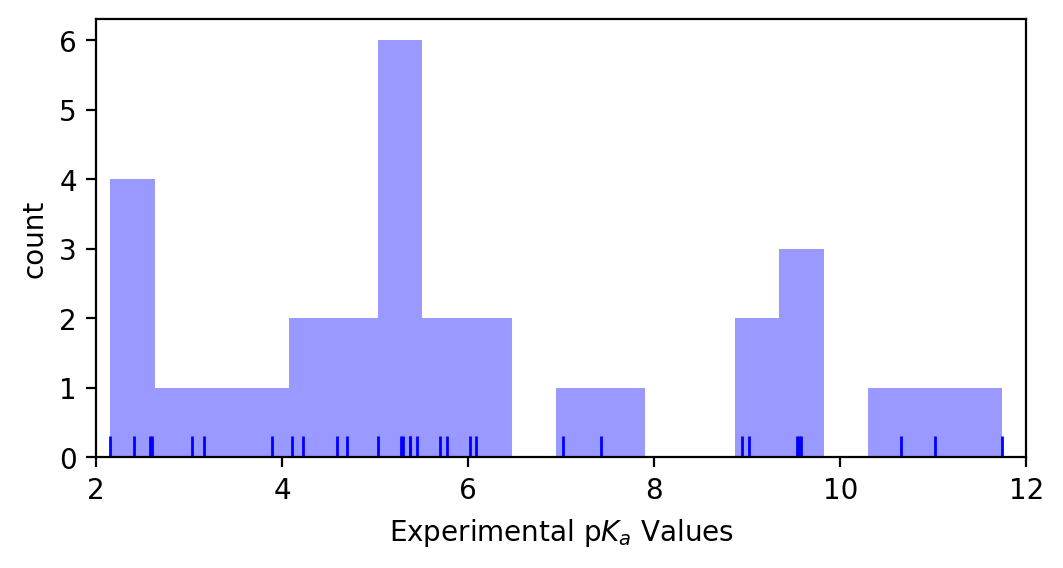

In [11]:
plt.figure(figsize=(6,3), dpi=200)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.xlim(2, 12)
plt.ylabel("count")
x = pKa_values 
x = pd.Series(x, name="Experimental p$K_a$ Values")
sns.distplot(x, hist= True, bins = 20, rug = True, kde=False, color = 'blue')
plt.savefig("distribution_of_exp_pKas.pdf")

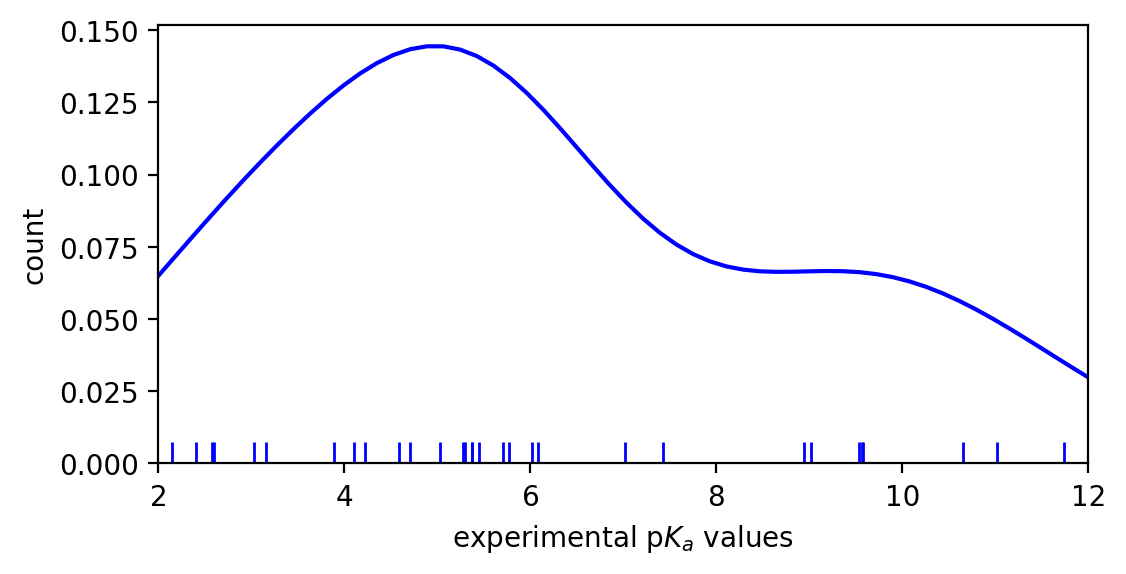

In [6]:
plt.figure(figsize=(6,3), dpi=200)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.xlim(2, 12)
plt.ylabel("count")
x = pKa_values 
x = pd.Series(x, name="experimental p$K_a$ values")
sns.distplot(x, hist= False, bins = 20, rug = True, kde=True, color = 'blue')

## 2. Plot distribution of molecular properties

These molecular properties were calculated using OpenEye toolkit in this repository: /sampl6-physicochemical-properties/analysis_of_pKa_predictions/20190227_typeIII_check_correlation_with_molecular_descriptors

In [7]:
df_mol_prop = pd.read_csv("SAMPL6_molecular_descriptors.csv")
df_mol_prop

,SAMPL6 Molecule ID,canonical isomeric SMILES,canonical isomeric SMILES w/o counter ions,MW,Heavy atom count,Rotatable bond count,Heteroatom count,Heteroatom to carbon ratio,Ring system count,Max ring size,Microstate count
0,SM01,c1cc2c(cc1O)c3c(o2)C(=O)NCCC3,c1cc2c(cc1O)c3c(o2)C(=O)NCCC3,217.22,16.0,0.0,4.0,0.33,1.0,14.0,8.0
1,SM02,c1ccc2c(c1)c(ncn2)Nc3cccc(c3)C(F)(F)F,c1ccc2c(c1)c(ncn2)Nc3cccc(c3)C(F)(F)F,289.26,21.0,3.0,6.0,0.40,2.0,10.0,11.0
2,SM03,c1ccc(cc1)Cc2nnc(s2)NC(=O)c3cccs3,c1ccc(cc1)Cc2nnc(s2)NC(=O)c3cccs3,301.39,20.0,5.0,6.0,0.43,3.0,6.0,16.0
3,SM04,c1ccc2c(c1)c(ncn2)NCc3ccc(cc3)Cl,c1ccc2c(c1)c(ncn2)NCc3ccc(cc3)Cl,269.73,19.0,3.0,4.0,0.27,2.0,10.0,11.0
4,SM05,c1ccc(c(c1)NC(=O)c2ccc(o2)Cl)N3CCCCC3,c1ccc(c(c1)NC(=O)c2ccc(o2)Cl)N3CCCCC3,304.77,21.0,4.0,5.0,0.31,3.0,6.0,9.0
5,SM06,c1cc2cccnc2c(c1)NC(=O)c3cc(cnc3)Br,c1cc2cccnc2c(c1)NC(=O)c3cc(cnc3)Br,328.16,20.0,3.0,5.0,0.33,2.0,10.0,12.0
6,SM07,c1ccc(cc1)CNc2c3ccccc3ncn2,c1ccc(cc1)CNc2c3ccccc3ncn2,235.28,18.0,3.0,3.0,0.20,2.0,10.0,11.0
7,SM08,Cc1ccc2c(c1)c(c(c(=O)[nH]2)CC(=O)O)c3ccccc3,Cc1ccc2c(c1)c(c(c(=O)[nH]2)CC(=O)O)c3ccccc3,293.32,22.0,3.0,4.0,0.22,2.0,10.0,8.0
8,SM09,COc1cccc(c1)Nc2c3ccccc3ncn2.Cl,COc1cccc(c1)Nc2c3ccccc3ncn2,251.28,19.0,3.0,4.0,0.27,2.0,10.0,11.0
9,SM10,c1ccc(cc1)C(=O)NCC(=O)Nc2nc3ccccc3s2,c1ccc(cc1)C(=O)NCC(=O)Nc2nc3ccccc3s2,311.36,22.0,6.0,6.0,0.38,2.0,9.0,33.0


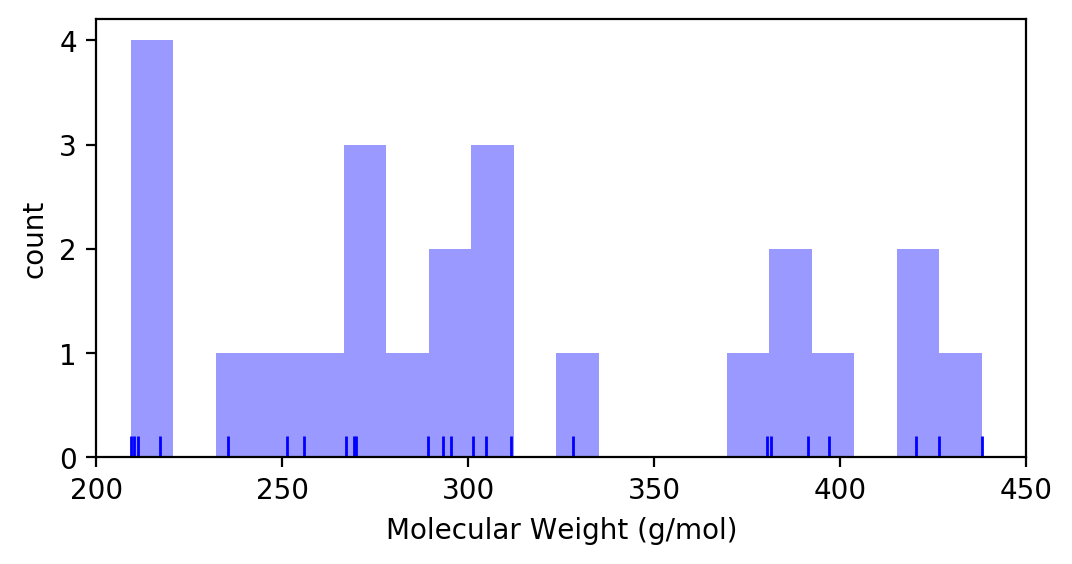

In [8]:
# Plot molecular weight histogram
plt.figure(figsize=(6,3), dpi=200)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.xlim(200, 450)
plt.ylabel("count")
x = df_mol_prop["MW"].values 
x = pd.Series(x, name="Molecular Weight (g/mol)")
sns.distplot(x, hist= True, bins = 20, rug = True, kde=False, color = 'blue')
plt.savefig("distribution_of_mw.pdf")

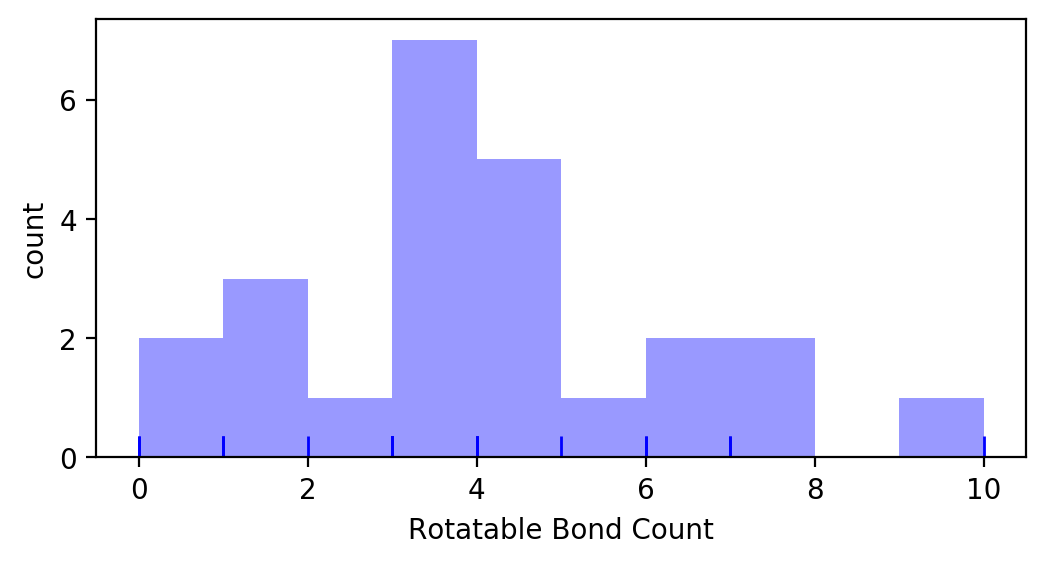

In [9]:
# Plot Rotatable bond count histogram
plt.figure(figsize=(6,3), dpi=200)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
#plt.xlim(200, 450)
plt.ylabel("count")
x = df_mol_prop["Rotatable bond count"].values 
x = pd.Series(x, name="Rotatable Bond Count")
sns.distplot(x, hist= True, bins = 10, rug = True, kde=False, color = 'blue')
plt.savefig("distribution_of_rotatable_bond_count.pdf")

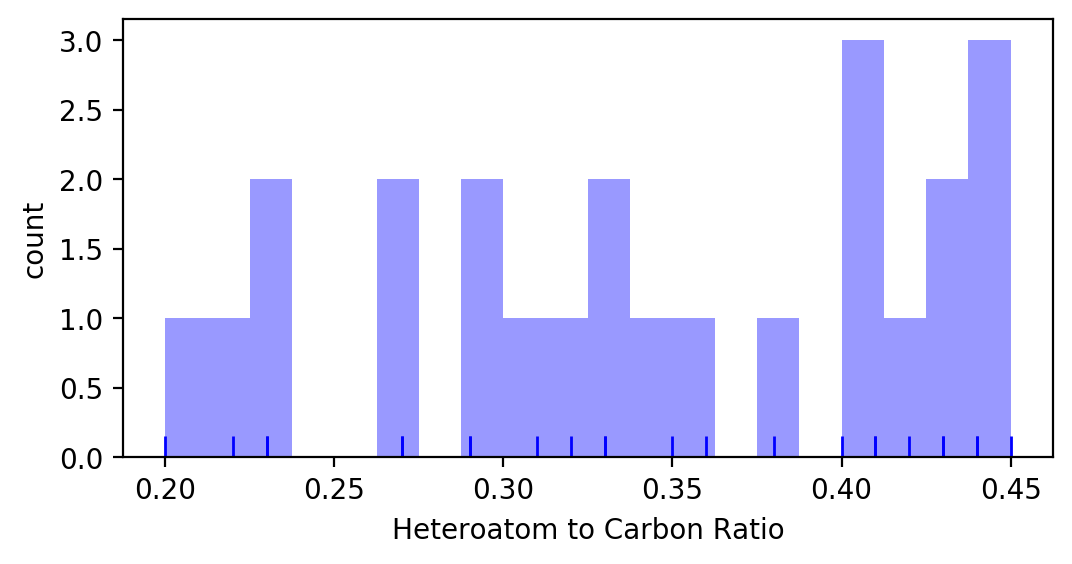

In [10]:
# Plot heteroatom to carbon ratio histogram
plt.figure(figsize=(6,3), dpi=200)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
#plt.xlim(200, 450)
plt.ylabel("count")
x = df_mol_prop["Heteroatom to carbon ratio"].values 
x = pd.Series(x, name="Heteroatom to Carbon Ratio")
sns.distplot(x, hist= True, bins = 20, rug = True, kde=False, color = 'blue')
plt.savefig("distribution_of_hetero_to_carbon_ratio.pdf")